In [1]:
import anndata
import pandas as pd
import scanpy as sc
import sklearn
import statsmodels.api as sm
import numpy as np
import math
import anndata as ad

annData = sc.read_h5ad("PapalexiSatija2021_eccite_RNA.h5ad")
dir(annData)

['T',
 'X',
 '_BACKED_ATTRS',
 '_H5_ALIASES',
 '_H5_ALIASES_NAMES',
 '_X',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adata_ref',
 '_check_dimensions',
 '_check_uniqueness',
 '_clean_up_old_format',
 '_gen_repr',
 '_get_X',
 '_get_and_delete_multicol_field',
 '_get_obs_array',
 '_get_var_array',
 '_has_X',
 '_init_as_actual',
 '_init_as_view',
 '_inplace_subset_obs',
 '_inplace_subset_var',
 '_is_view',
 '_layers',
 '_mutated_copy',
 '_n_obs',
 '_n_vars',
 '_normalize_indices',
 '_obs',
 '_obsm',
 '_obsp',
 '_oidx',
 '_prep_dim_index',
 '_raw',
 '_remove_unused_categories',
 '_sanitize'

control     2386
IFNGR2g1     579
ATF2g1       500
IFNGR1g3     416
CD86g1       401
            ... 
CUL3g3        15
SPI1g1        14
SPI1g2        10
SPI1g4         7
MYCg4          1
Name: perturbation, Length: 99, dtype: int64
             AAACCTGAGCCAGAAC  AAACCTGAGTGGACGT  AAACCTGCATGAGCGA  \
gene_symbol                                                         
STAT3                     5.0               2.0               0.0   
GRB2                      3.0               1.0               2.0   
SOS1                      0.0               0.0               1.0   
FLT3                      0.0               0.0               0.0   
ARAF                      0.0               0.0               0.0   
HRAS                      0.0               0.0               1.0   
PIK3R1                    1.0               0.0               3.0   
NRAS                      4.0               0.0               4.0   
KRAS                      1.0               1.0               3.0   
PIK3CA   

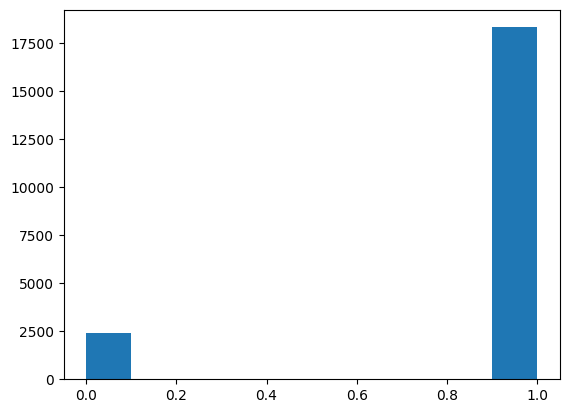

In [2]:
perturb_labels_count = annData.obs['perturbation'].value_counts()
print(perturb_labels_count)

import matplotlib.pyplot as plt
plt.hist( annData.obs['nperts'])
annData.X.todense()
#convert the sparse matrix into a dense one
X=pd.DataFrame(annData.X.todense()) 
#obtain the data frame
cell_name=annData.obs.index
chr_name=annData.var.index
X.index=cell_name
X.columns=chr_name
X=X.T #let the rows represent gene symbol and the columns represent cell with a barcode
subset = ['FLT3','GRB2','SOS1','NRAS','HRAS','KRAS','PIK3CA','PIK3R1','ARAF','STAT3']
#'FLT3',...CCND1 represents the AML genes
subset = list(set(subset))
sub_df = (X.loc[subset,])
print(sub_df)

In [3]:
sub_df.loc['sequencing_depth'] = X.apply(lambda x:x.sum(),axis=0)
print(sub_df)
sums = (sub_df == 0).astype(int).sum(axis=1)
# acquire the index of the rows need deleting
print(sums)

                  AAACCTGAGCCAGAAC  AAACCTGAGTGGACGT  AAACCTGCATGAGCGA  \
gene_symbol                                                              
STAT3                          5.0               2.0               0.0   
GRB2                           3.0               1.0               2.0   
SOS1                           0.0               0.0               1.0   
FLT3                           0.0               0.0               0.0   
ARAF                           0.0               0.0               0.0   
HRAS                           0.0               0.0               1.0   
PIK3R1                         1.0               0.0               3.0   
NRAS                           4.0               0.0               4.0   
KRAS                           1.0               1.0               3.0   
PIK3CA                         0.0               0.0               0.0   
sequencing_depth           17207.0            9506.0           15256.0   

                  AAACCTGTCTTGTCAT  A

In [16]:
sums_result = list(sums[sums >sub_df.shape[1]*0.99].index)
#drop these rows
df = sub_df.drop(sums_result, axis=0)
print(df)
cells = df.columns
genes = df.index
sequencing_depth = (df.loc['sequencing_depth', :])
y = df[0:1]
y = y.T
def func(x):
    return x+1

def func1(x):
    return math.log(x+1.01)

def func2(x):
    return math.log(x+2)

def func3(x):
    return math.sqrt(x+1)+math.sqrt(x+2)-1.5

def func4(x):
    return math.sqrt(x+1.01)

sequencing_depth = pd.DataFrame(sequencing_depth)
x = sequencing_depth.applymap(func)
#x represents the log(sequencing_depth) data
model = sm.GLM(y,x,family=sm.families.Poisson())
#use the log(sequencing_depth) as the intercept of Poisson regression
results = model.fit()
print(results.summary())

                  AAACCTGAGCCAGAAC  AAACCTGAGTGGACGT  AAACCTGCATGAGCGA  \
gene_symbol                                                              
STAT3                          5.0               2.0               0.0   
GRB2                           3.0               1.0               2.0   
SOS1                           0.0               0.0               1.0   
FLT3                           0.0               0.0               0.0   
ARAF                           0.0               0.0               0.0   
HRAS                           0.0               0.0               1.0   
PIK3R1                         1.0               0.0               3.0   
NRAS                           4.0               0.0               4.0   
KRAS                           1.0               1.0               3.0   
PIK3CA                         0.0               0.0               0.0   
sequencing_depth           17207.0            9506.0           15256.0   

                  AAACCTGTCTTGTCAT  A

                         0
AAACCTGAGCCAGAAC  1.068660
AAACCTGAGTGGACGT  0.228221
AAACCTGCATGAGCGA -1.000000
AAACCTGTCTTGTCAT -0.231571
AAACGGGAGAACAACT  0.826620
...                    ...
TTTGTCAGTCACTTCC  1.057968
TTTGTCAGTGACGGTA  1.032275
TTTGTCAGTTCCACAA -0.539197
TTTGTCATCACGCATA  0.125499
TTTGTCATCTGTACGA -0.693995

[20729 rows x 1 columns]


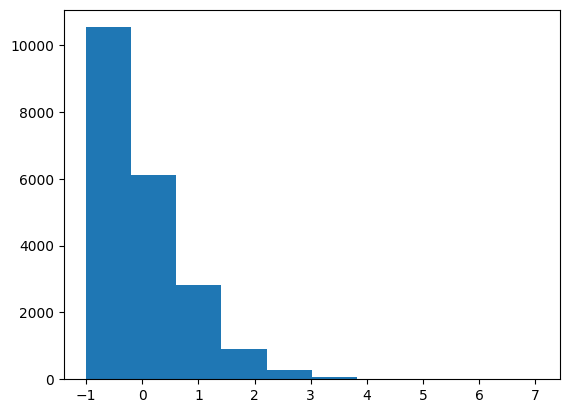

In [17]:
resid = results.resid_working
resid = pd.DataFrame(resid)
print(resid)
import matplotlib.pyplot as plt
import numpy as np

plt.hist(resid)
working_residuals = resid
#working_residual is a dataframe storing thr working residual data
working_residuals.columns = [genes[0]]

In [18]:
#perform poisson regression for each gene/protein
for i in range(1,df.shape[0]-1):
    y = df[i:i+1].T
    model = sm.GLM(y,x,family=sm.families.Poisson())
    results = model.fit()
    #print(results.summary())
    resid=results.resid_working
    resid = pd.DataFrame(resid)
    resid.columns = [genes[i]]
    val = pd.concat([working_residuals,resid],axis = 1)
    working_residuals = val

In [19]:
working_residuals = working_residuals.applymap(func3)
print(working_residuals)

                     STAT3      GRB2      SOS1  FLT3      ARAF      HRAS  \
AAACCTGAGCCAGAAC  1.690043  0.582075 -0.500000  -0.5 -0.500000 -0.500000   
AAACCTGAGTGGACGT  1.100974  0.347359 -0.500000  -0.5 -0.500000 -0.500000   
AAACCTGCATGAGCGA -0.500000  0.442245  2.915336  -0.5 -0.500000  1.537540   
AAACCTGTCTTGTCAT  0.706424  1.965965 -0.500000  -0.5 -0.500000 -0.500000   
AAACGGGAGAACAACT  1.532781  0.339833 -0.500000  -0.5 -0.500000 -0.500000   
...                    ...       ...       ...   ...       ...       ...   
TTTGTCAGTCACTTCC  1.683267  0.389039  4.172798  -0.5  2.332584 -0.500000   
TTTGTCAGTGACGGTA  1.666922  1.113093 -0.500000  -0.5  2.040212  1.652066   
TTTGTCAGTTCCACAA  0.387462  1.847115  2.886490  -0.5  1.842707 -0.500000   
TTTGTCATCACGCATA  1.018804  1.535235 -0.500000  -0.5  2.605940  2.297517   
TTTGTCATCTGTACGA  0.195983  0.922389  4.781436  -0.5  2.546629  1.953934   

                    PIK3R1      NRAS      KRAS     PIK3CA  
AAACCTGAGCCAGAAC  1.195349 

In [20]:
wr_csv_data = working_residuals.to_csv('D:/SummerIntern/Datasets/PapalexiSatija2021_eccite_RNA_working_residuals2_exp2.csv', index = True)
print('\nCSV String:\n', wr_csv_data)


CSV String:
 None


In [21]:
Z = pd.DataFrame(annData.obs['perturbation'])

def cut_tail(y):
    return(y[:-2])
    
Z = Z.applymap(cut_tail)
print(Z)
Target_genes = list(Z['perturbation'].unique())
selected_subset = working_residuals.columns
Perturb_subset = list(selected_subset & Target_genes)
print(Perturb_subset)

                 perturbation
AAACCTGAGCCAGAAC        STAT2
AAACCTGAGTGGACGT         CAV1
AAACCTGCATGAGCGA        STAT1
AAACCTGTCTTGTCAT         CD86
AAACGGGAGAACAACT         IRF7
...                       ...
TTTGTCAGTCACTTCC        CMTM6
TTTGTCAGTGACGGTA        contr
TTTGTCAGTTCCACAA         ATF2
TTTGTCATCACGCATA         CAV1
TTTGTCATCTGTACGA        STAT3

[20729 rows x 1 columns]
['STAT3']


C:\Users\Eurus2003\AppData\Local\Temp\ipykernel_7208\2377119836.py:10: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  Perturb_subset = list(selected_subset & Target_genes)


In [23]:
wr_csv_data2 = Z.to_csv('D:/SummerIntern/Datasets/PapalexiSatija2021_eccite_RNA_perturbation_information_exp2.csv', index = True)
print('\nCSV String:\n', wr_csv_data2)


CSV String:
 None
